In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

# Get data

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [4]:
!ls -l data

total 16656
-rw-r--r-- 1 root root 17051982 Apr 28 18:27 mnist.pkl.gz


In [5]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [6]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [7]:
def chunks(x, sz):
  for i in range(0, len(x), sz): yield x[i:i+sz]

In [8]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

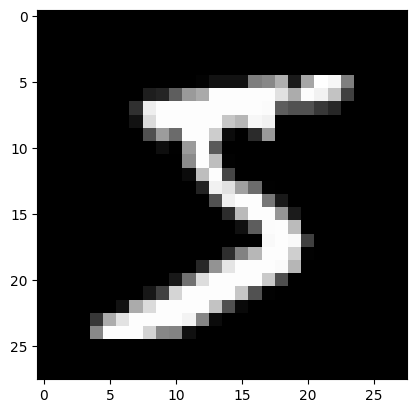

In [9]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)))

In [10]:
from itertools import islice

In [11]:
it = iter(vals)
islice(it, 5)

In [12]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [13]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [14]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

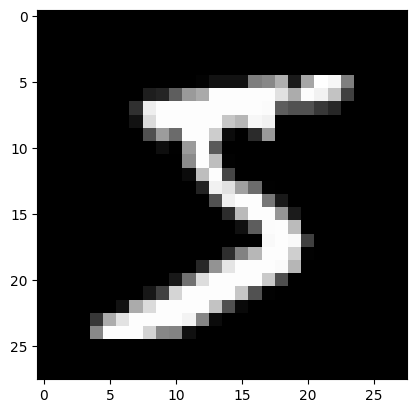

In [15]:
plt.imshow(img);

# Matrix and Tensor

In [16]:
img[20][15]

0.98828125

In [17]:
class Matrix:
  def __init__(self, xs): 
    self.xs = xs
  def __getitem__(self, idxs):
    return self.xs[idxs[0]][idxs[1]]

In [18]:
m = Matrix(img)
m[20, 15]

0.98828125

In [19]:
import torch
from torch import tensor

In [20]:
tensor([1,2,3])

tensor([1, 2, 3])

In [21]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train,y_train,x_valid, y_valid))

In [22]:
x_train.shape

torch.Size([50000, 784])

In [23]:
x_train.type()

'torch.FloatTensor'

In [24]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

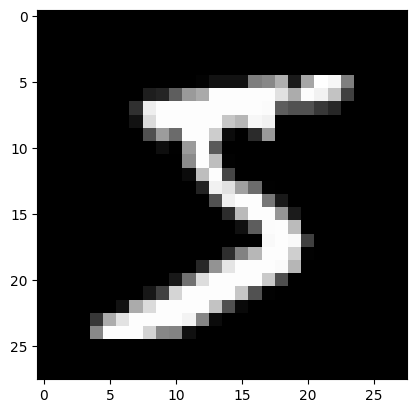

In [25]:
plt.imshow(imgs[0])

In [26]:
imgs[0].shape

torch.Size([28, 28])

In [27]:
imgs[0,20,15]

tensor(0.9883)

In [28]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [29]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

# Random Numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

In [30]:
rnd_state = None
def seed(a):
  global rnd_state
  a, x = divmod(a, 30268)
  a, y = divmod(a, 30306)
  a, z = divmod(a, 30322)
  rnd_state = int(x) + 1, int(y) + 1, int(z) + 1

In [31]:
seed(457428928475)
rnd_state

(25244, 20237, 499)

In [32]:
def rand():
  global rnd_state
  x, y, z = rnd_state
  x = (171 * x) % 30269
  y = (172 * y) % 30307
  z = (170 * z) % 30323
  rnd_state = x, y, z
  return (x / 30269 + y/30307 + z/30323) % 1

In [33]:
rand(), rand(), rand()

(0.25975837198507623, 0.4713018207084603, 0.23838051176729458)

In [34]:
torch.randn(1)

tensor([-1.8322])

# Matrix Multiplication

In [35]:
import torch

In [36]:
torch.manual_seed(1)

In [37]:
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [38]:
m1 = x_valid[:5]
m2 = weights

In [39]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [40]:
ar, ac = m1.shape
br, bc = m2.shape
(ar, ac), (br, bc)

((5, 784), (784, 10))

In [41]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [42]:
for i in range(ar): # 5
  for j in range(bc): # 10
    for k in range(ac): # 784
      t1[i, j] += m1[i,k] * m2[k, j]

In [43]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [44]:
t1.shape

torch.Size([5, 10])

In [45]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [46]:
def matmul(a, b):
  ar, ac = a.shape
  br, bc = b.shape
  
  t1 = torch.zeros(ar, bc)
  
  for i in range(ar): # 5
    for j in range(bc): # 10
      for k in range(ac): # 784
        t1[i, j] += m1[i,k] * m2[k, j]
  return t1

In [47]:
%time _= matmul(m1, m2)

CPU times: user 1.5 s, sys: 24.8 ms, total: 1.52 s
Wall time: 3.57 s


# Numba

In [48]:
from numba import njit

In [49]:
@njit
def dot(a,b):
  res = 0.
  for i in range(len(a)): res += a[i]*b[i]
  return res

In [50]:
from numpy import array

In [51]:
%time dot(array([1.,2.,3.]), array([2.,3,4]))

CPU times: user 659 ms, sys: 82.4 ms, total: 741 ms
Wall time: 1.05 s


20.0

In [52]:
%time dot(array([1.,2.,3.]), array([2.,3,4]))

CPU times: user 39 µs, sys: 0 ns, total: 39 µs
Wall time: 43.9 µs


20.0

# Elementwise ops

In [53]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [54]:
a + b

tensor([12., 14.,  3.])

In [55]:
m = tensor([[1.,2,3], [4,5,6], [7,8,9]])
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

# Frobenius Norm

In [56]:
sf = (m*m).sum()
sf

tensor(285.)

In [57]:
sf.sqrt()

tensor(16.88)

In [58]:
m[2,:], m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

# Broadcasting

In [59]:
a

tensor([10.,  6., -4.])

In [60]:
a > 0

tensor([ True,  True, False])

In [61]:
a + 1

tensor([11.,  7., -3.])

In [62]:
c = tensor([10., 20, 30]); c

tensor([10., 20., 30.])

In [63]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [64]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [65]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [66]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [67]:
t = c.expand_as(m)
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [68]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [69]:
t.storage()

<ipython-input-69-9fabd8d8a8f0>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t.storage()
/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/torch/storage.py:645: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use

 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [70]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [71]:
def matmul(a,b):
  (ar, ac), (br, bc) = a.shape, b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    c[i] = (a[i,:,None] * b).sum(dim=0)
  return c 

In [72]:
%timeit -n 50 _=matmul(m1,m2)

473 µs ± 155 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


# Einstein sumation

In [74]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [73]:
mr = torch.einsum('ik, kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [75]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [76]:
torch.einsum('ik, kj ->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [77]:
def matmul(a,b): return torch.einsum('ik, kj->ij', a, b)